# iNeuron Internship Project
by- SHRUTI KHANDELWAL

# Project Title: Financial Analytics

Technologies: Business Intelligence

Domain : Finance


Project Difficulties level: Intermediate

### Problem Statement:
Without analyzing the competition, it is difficult for a business to survive. 

You are tasked to analyzing the competition for the management to provide better results.

This data set has information on the market capitalization of the top 500 companies in India.


Serial Number, Name of Company, Market Capitalization in Crores ,Quarterly Sale in crores


Find key metrics and factors and show the meaningful relationships between attributes.

Do your own research and come up with your findings.

##### Importing Libraries

Importing the necessary libraries for data manipulation, analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Loading Dataset

Read the dataset file into a pandas DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Top 500 Companies - India.csv')
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


#### Defining columns: 

Market Capitalization: Market capitalization is a measure of the total value of a publicly traded company.
It is calculated by multiplying the current market price of a company's outstanding shares by the total number of those shares. 

It is used as an indicator of a company's size and is one of the most commonly used metrics to evaluate and compare companies in the financial markets.

Companies with larger market capitalizations are generally considered to be more established and stable, while those with smaller market capitalizations are often seen as riskier or having greater growth potential. 
    

Sales : Sales, in a business context, refers to the revenue generated from the selling of goods or services to customers. It represents the total value of products or services sold by a company during a specific period, typically measured in monetary terms.   

##### Data Exploration and Preprocessing

Perform initial data exploration to understand the structure of the dataset and preprocess it as needed.

In [3]:
#Checking columns
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [4]:
#Total number of rows and columns
df.shape

(488, 5)

In [5]:
#Complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [6]:
#Checking duplicate values
df.duplicated().sum()

0

In [7]:
#Checking null values
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [8]:
#Removing unncessary column
df = df.drop('Unnamed: 4', axis =1 )

In [9]:
#Handling missing values by dropping rows with missing values
df = df.dropna()

In [10]:
#Let's check our dataset now!
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [11]:
#Statistical description
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,365.000000,365.000000,365.000000
mean,250.435616,31300.970301,4395.976849
std,147.106354,67224.641338,11092.206185
min,1.000000,3017.070000,47.240000
25%,133.000000,5089.870000,593.740000
50%,264.000000,9097.330000,1278.300000
75%,363.000000,21372.180000,2840.750000
max,499.000000,583436.720000,110666.930000


##### Feature Engineering

Create additional meaningful features that can aid in the analysis. For example, calculate the profit margin using the existing columns.

Profit Margin: It represents the proportion of profit earned per unit of sales. A higher profit margin implies that the company is effectively generating profits from its operations.

In [12]:
# Calculate Profit Margin
df['Profit Margin'] = df['Mar Cap - Crore'] / df['Sales Qtr - Crore']


In [13]:
# Calculate Market Share
total_market_sales = df['Sales Qtr - Crore'].sum()
df['Market_Share'] = (df['Sales Qtr - Crore'] / total_market_sales) * 100

In [14]:
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Profit Margin,Market_Share
0,1,Reliance Inds.,583436.72,99810.00,5.845474,6.220507
1,2,TCS,563709.84,30904.00,18.240676,1.926045
2,3,HDFC Bank,482953.59,20581.27,23.465685,1.282696
3,4,ITC,320985.27,9772.02,32.847382,0.609026
4,5,H D F C,289497.37,16840.51,17.190535,1.049559


##### Exploratory Data Analysis (EDA)

 Perform exploratory analysis to gain insights into the dataset and identify relationships between attributes.

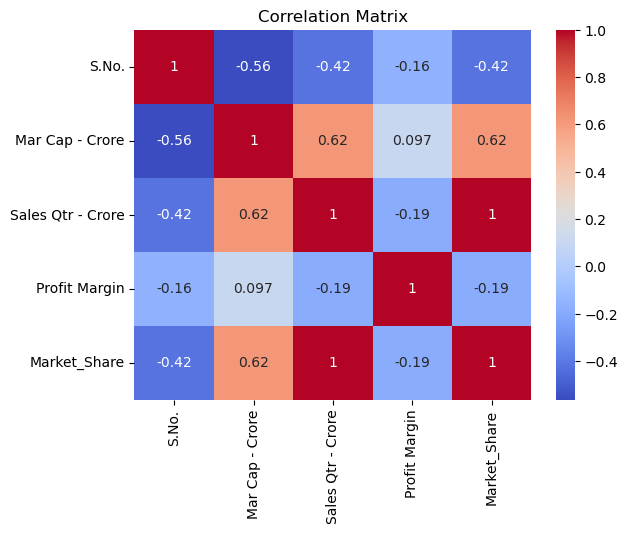

In [15]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights: 
    
1. Market Capitalization and Sales are moderately correlated.
2. There is negative and zero correlation between Profit Margin with respect to Sales and Market Cap.

##### Key Metrics and Factors: 

Identify key metrics and factors for analysis. For example, you can focus on market capitalization and sales as key indicators of competition.

In [16]:
# Key Metrics
mean_market_cap = df['Mar Cap - Crore'].mean()
median_market_cap = df['Mar Cap - Crore'].median()
total_sales = df['Sales Qtr - Crore'].sum()

print(f"Mean Market Capitalization: {mean_market_cap}")
print(f"Median Market Capitalization: {median_market_cap}")
print(f"Total Sales: {total_sales}")


Mean Market Capitalization: 31300.970301369864
Median Market Capitalization: 9097.33
Total Sales: 1604531.55


##### Comparative Analysis and Data Visualization:

Conduct comparative analysis and visualize the data to understand competition and relationships between variables.

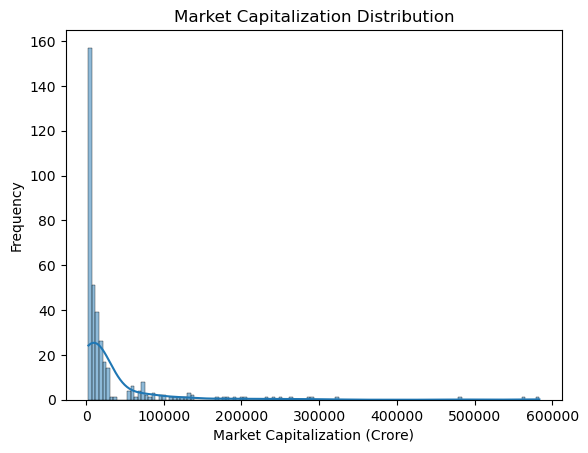

In [17]:
# Visualize Market Capitalization
sns.histplot(df['Mar Cap - Crore'], kde=True)
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')
plt.show()

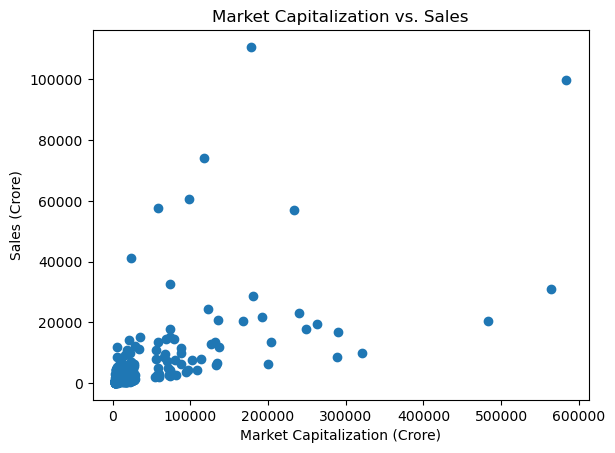

In [18]:
# Scatter plot of Market Cap vs. Sales
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])
plt.title('Market Capitalization vs. Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Sales (Crore)')
plt.show()


### TOP 5 COMPANIES WITH HIGH MARKET CAPITALIZATION:

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
1      Reliance Inds.  583436.72        99810.00           5.845474       6.220507        1
2      TCS             563709.84        30904.00           18.240676      1.926045        1
3      HDFC Bank       482953.59        20581.27           23.465685      1.282696        1
4      ITC             320985.27        9772.02            32.847382      0.609026        1
5      H D F C         289497.37        16840.51           17.190535      1.049559        1
dtype: int64


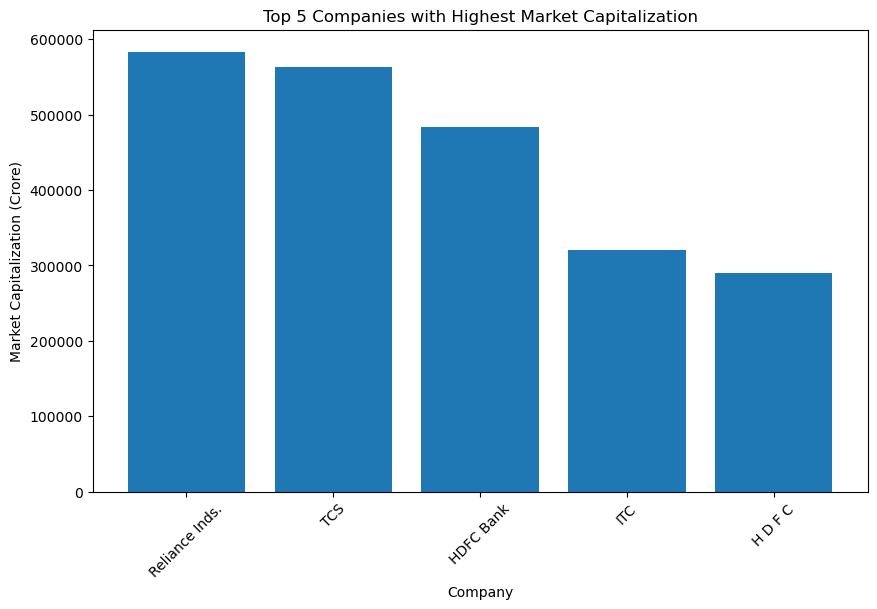

In [19]:
# Sort the dataset by market capitalization in descending order
sorted_data = df.sort_values('Mar Cap - Crore', ascending=False)

# Select the top 5 companies with the highest market capitalization
top_5_companies = sorted_data.head(5)


print(top_5_companies.value_counts())
# Plot the market capitalization of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies['Name'], top_5_companies['Mar Cap - Crore'])
plt.title('Top 5 Companies with Highest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

### BOTTOM 5 COMPANIES WITH LOW MARKET CAPITALIZATION:

S.No.  Name             Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
495    Prime Focus      3031.50          609.61             4.972851       0.037993        1
496    Lak. Vilas Bank  3029.57          790.17             3.834074       0.049246        1
497    NOCIL            3026.26          249.27             12.140490      0.015535        1
498    Orient Cement    3024.32          511.53             5.912302       0.031880        1
499    Natl.Fertilizer  3017.07          2840.75            1.062068       0.177045        1
dtype: int64


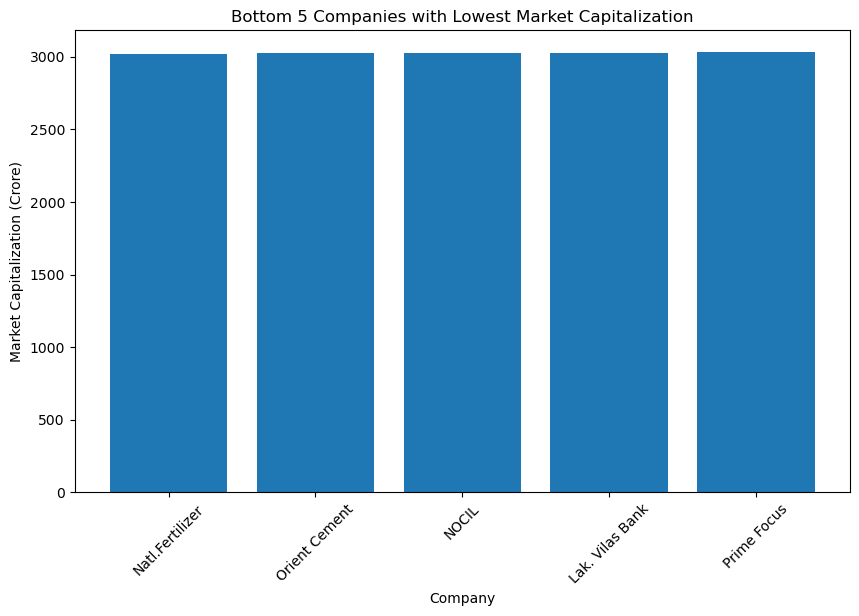

In [20]:
# Sort the dataset by market capitalization in ascending order
sorted_data = df.sort_values('Mar Cap - Crore')

# Select the bottom 5 companies with the lowest market capitalization
bottom_5_companies = sorted_data.head(5)


print(bottom_5_companies.value_counts())



# Plot the market capitalization of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies['Name'], bottom_5_companies['Mar Cap - Crore'])
plt.title('Bottom 5 Companies with Lowest Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Capitalization (Crore)')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH HIGHEST SALES:

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
1      Reliance Inds.  583436.72        99810.00           5.845474       6.220507        1
15     I O C L         178017.48        110666.93          1.608588       6.897149        1
24     Tata Motors     117071.87        74156.07           1.578723       4.621665        1
28     B P C L         98278.00         60616.36           1.621311       3.777823        1
55     H P C L         58034.78         57474.25           1.009753       3.581996        1
dtype: int64


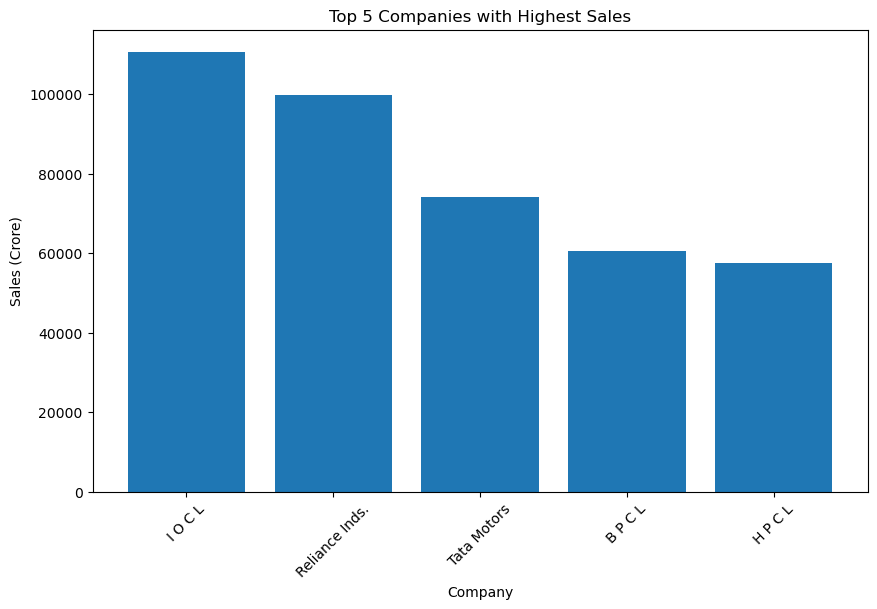

In [21]:
# Sort the dataset by sales in descending order
sorted_data = df.sort_values('Sales Qtr - Crore', ascending=False)

# Select the top 5 companies with the highest sales
top_5_companies_sales = sorted_data.head(5)

print(top_5_companies_sales.value_counts())
# Plot the sales of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_sales['Name'], top_5_companies_sales['Sales Qtr - Crore'])
plt.title('Top 5 Companies with Highest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

### BOTTOM 5 COMPANIES WITH LOWEST SALES:

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
1      Reliance Inds.  583436.72        99810.00           5.845474       6.220507        1
15     I O C L         178017.48        110666.93          1.608588       6.897149        1
24     Tata Motors     117071.87        74156.07           1.578723       4.621665        1
28     B P C L         98278.00         60616.36           1.621311       3.777823        1
55     H P C L         58034.78         57474.25           1.009753       3.581996        1
dtype: int64


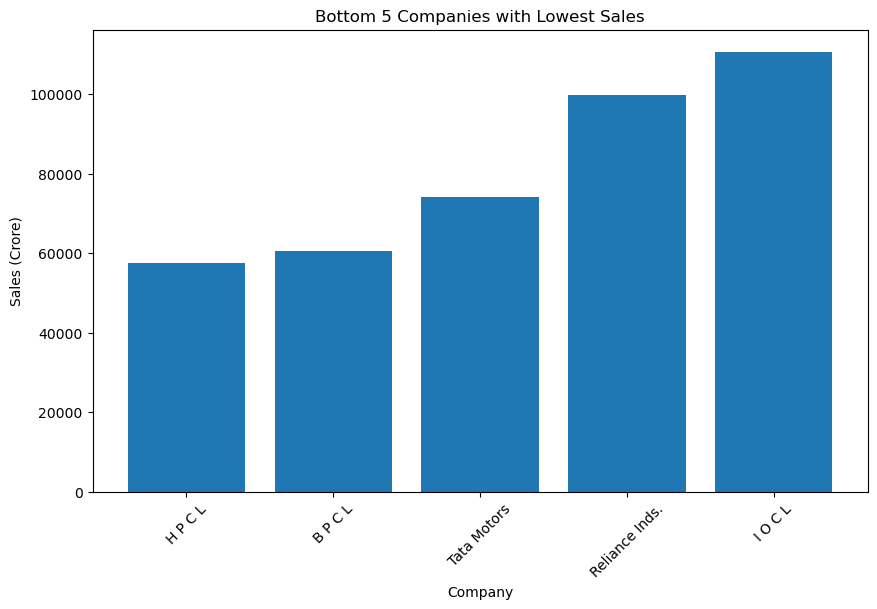

In [22]:
# Sort the dataset by sales in ascending order
sorted_data = df.sort_values('Sales Qtr - Crore')

# Select the bottom 5 companies with the highest sales
bottom_5_companies_sales = sorted_data.tail(5)
print(bottom_5_companies_sales.value_counts())
# Plot the sales of the bottom 5 companies
plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_sales['Name'], bottom_5_companies_sales['Sales Qtr - Crore'])
plt.title('Bottom 5 Companies with Lowest Sales')
plt.xlabel('Company')
plt.ylabel('Sales (Crore)')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH HIGHEST PROFIT MARGIN:

S.No.  Name              Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
130    Gillette India    21976.74         407.52             53.928004      0.025398        1
193    Indiabulls Vent.  13396.15         238.43             56.184834      0.014860        1
215    Symphony          11882.55         217.63             54.599779      0.013563        1
468    La Opala RG       3510.93          69.77              50.321485      0.004348        1
480    Central Dep. Ser  3316.31          47.24              70.201312      0.002944        1
dtype: int64


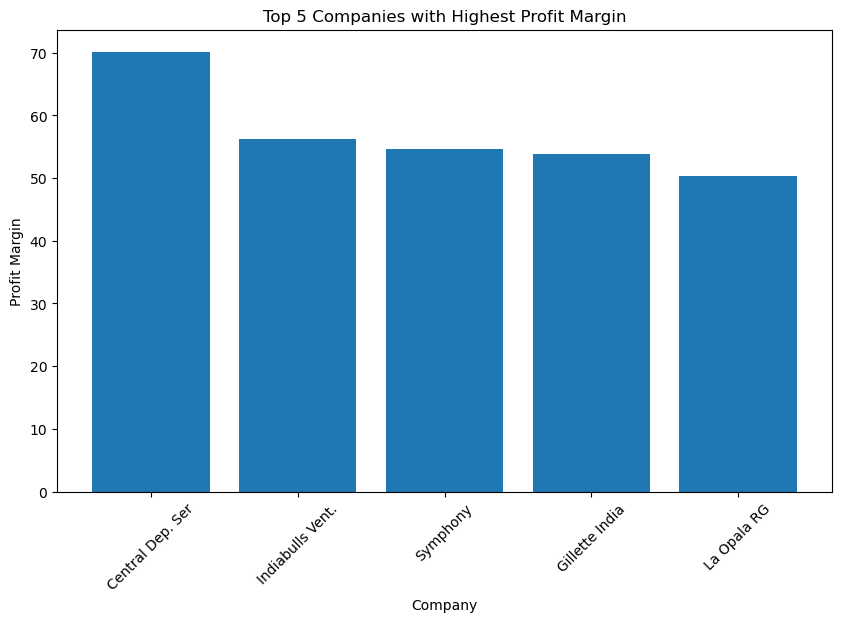

In [23]:
# Sort the dataset by profit margin in descending order
sorted_data = df.sort_values('Profit Margin', ascending=False)

# Select the top 5 companies with the highest profit margin
top_5_companies_pm = sorted_data.head(5)


print(top_5_companies_pm.value_counts())

# Plot the profit margin of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_pm['Name'], top_5_companies_pm['Profit Margin'])
plt.title('Top 5 Companies with Highest Profit Margin')
plt.xlabel('Company')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()


### BOTTOM 5 COMPANIES WITH LOWEST PROFIT MARGIN:

S.No.  Name              Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
123    Rajesh Exports    23495.54         41304.84           0.568833       2.574262        1
333    Redington India   5896.54          11728.40           0.502757       0.730955        1
347    C P C L           5427.82          8587.17            0.632085       0.535182        1
454    Corporation Bank  3716.46          4387.85            0.846989       0.273466        1
457    Oriental Bank     3674.60          4262.08            0.862161       0.265628        1
dtype: int64


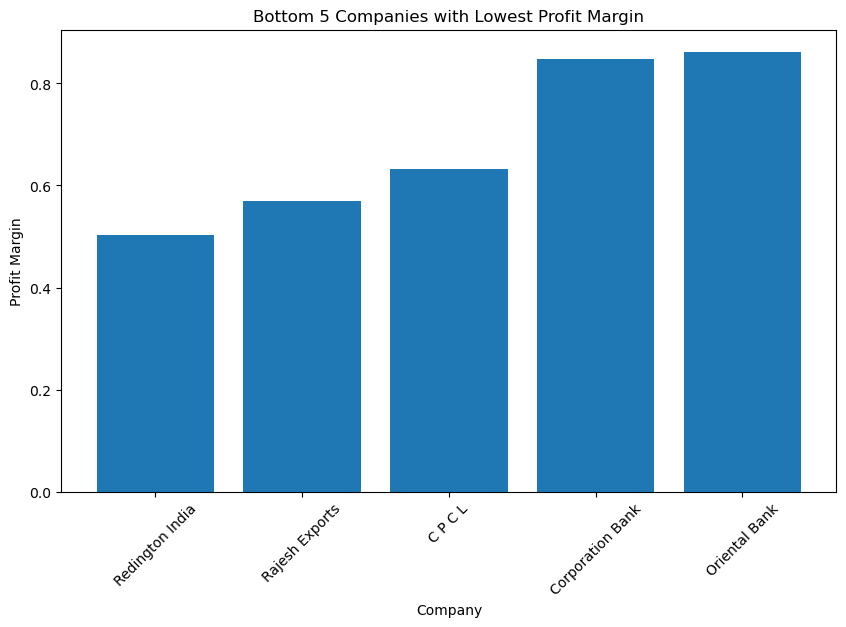

In [24]:
# Sort the dataset by profit margin in ascending order
sorted_data = df.sort_values('Profit Margin')

# Select the bottom 5 companies with the lowest profit margin
bottom_5_companies_pm = sorted_data.head(5)


print(bottom_5_companies_pm.value_counts())

# Plot the profit margin of the bottom 5 companies

plt.figure(figsize=(10, 6))
plt.bar(bottom_5_companies_pm['Name'], bottom_5_companies_pm['Profit Margin'])
plt.title('Bottom 5 Companies with Lowest Profit Margin')
plt.xlabel('Company')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()

### TOP 5 COMPANIES WITH HIGHEST MARKET SHARE:

S.No.  Name            Mar Cap - Crore  Sales Qtr - Crore  Profit Margin  Market_Share
1      Reliance Inds.  583436.72        99810.00           5.845474       6.220507        1
15     I O C L         178017.48        110666.93          1.608588       6.897149        1
24     Tata Motors     117071.87        74156.07           1.578723       4.621665        1
28     B P C L         98278.00         60616.36           1.621311       3.777823        1
55     H P C L         58034.78         57474.25           1.009753       3.581996        1
dtype: int64


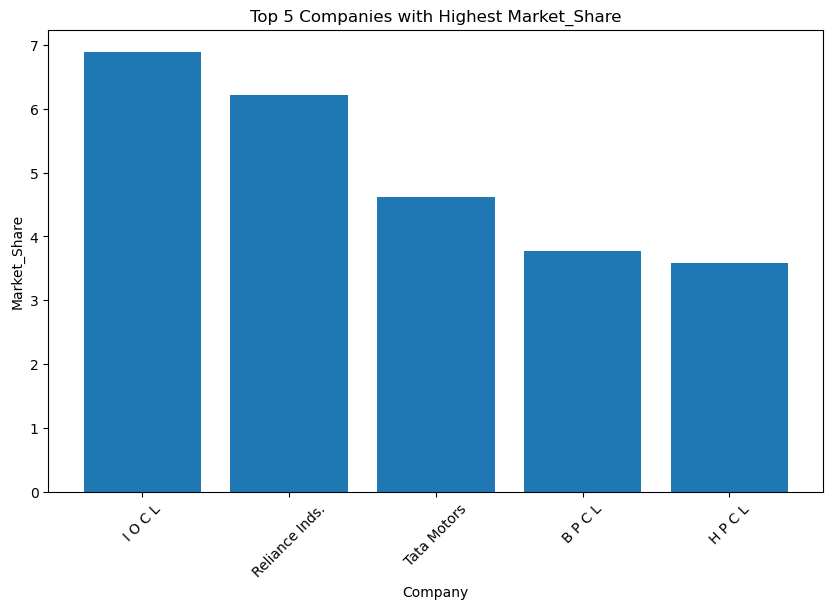

In [25]:
# Sort the dataset by profit margin in descending order
sorted_data_MS = df.sort_values('Market_Share', ascending=False)

# Select the top 5 companies with the highest profit margin
top_5_companies_MS = sorted_data_MS.head(5)


print(top_5_companies_MS.value_counts())

# Plot the profit margin of the top 5 companies
plt.figure(figsize=(10, 6))
plt.bar(top_5_companies_MS['Name'], top_5_companies_MS['Market_Share'])
plt.title('Top 5 Companies with Highest Market_Share')
plt.xlabel('Company')
plt.ylabel('Market_Share')
plt.xticks(rotation=45)
plt.show()


# CONCLUSION

The correlation coefficient of 0.62 suggests that there is a positive relationship between market capitalization and sales. 

As sales increase, there is a tendency for market capitalization to increase as well. This indicates that sales performance has a significant impact on the market value of a company.

Therefore, companies should focus on strategies to drive sales growth. This can involve expanding market reach, introducing new products or services, improving marketing and sales efforts, and targeting customer needs effectively.

While sales have a positive correlation with market capitalization, it's important to note that market capitalization is influenced by various other factors as well. These factors can include industry trends, company profitability, competitive landscape, management quality, brand value, and investor sentiment. Therefore, market capitalization should not be solely relied upon as a measure of a company's performance or value.